# Parte 2 - Ejercicios Teóricos y Prácticos

## Tasks 1
Suponga que la cantidad promedio de buses que llegan a una parada de bus dada es de 2 cada 30 minutos.
Considere X como la cantidad de buses que llegan a la mencionada parada de bus.


1. ¿Puede ser este evento modelado por una distribución de Poisson? ¿Por qué?

- Si porque es medido en un intervalo de tiempo y hay un promedio de ocurrencias en ese intervalo.

2. Calcule y grafique la probabilidad para diferentes números de buses, yendo desde 0 hasta 100. ¿Cuál es la
cantidad de buses más probable?


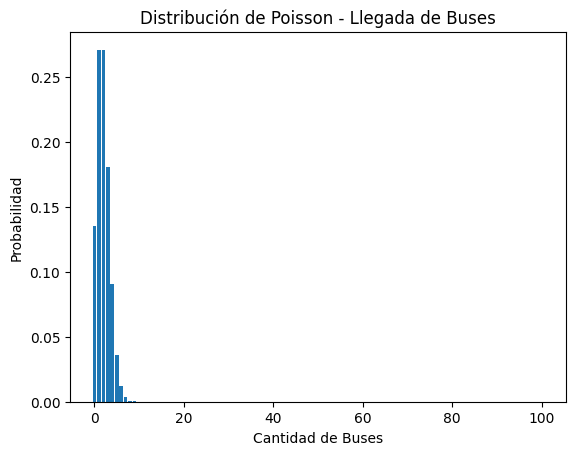

La cantidad de buses más probable es: 1 buses


In [12]:
import math
import matplotlib.pyplot as plt

def poisson(lambd, k):
    return (math.exp(-lambd) * lambd**k) / math.factorial(k)

lambd = 2  # Tasa promedio de llegada de buses cada 30 minutos

# Calcular las probabilidades para diferentes números de buses (desde 0 hasta 100)
num_buses = list(range(101))
prob = [poisson(lambd, k) for k in num_buses]

# Graficar la probabilidad para diferentes números de buses
plt.bar(num_buses, prob)
plt.xlabel('Cantidad de Buses')
plt.ylabel('Probabilidad')
plt.title('Distribución de Poisson - Llegada de Buses')
plt.show()

# Encontrar la cantidad de buses más probable 
max_prob_index = prob.index(max(prob))
mas_probable = num_buses[max_prob_index]
print(f"La cantidad de buses más probable es: {mas_probable} buses")


# Parte 3 - Ejercicios Prácticos

## Task 1
Analice los patrones de llegada de los clientes utilizando diferentes distribuciones de probabilidad
1. Simule las llegadas de clientes durante un período de 10 horas mediante una distribución geométrica con
parámetro p=0,2.
2. Grafique los tiempos de llegada de los clientes y calcule el tiempo promedio entre llegadas.

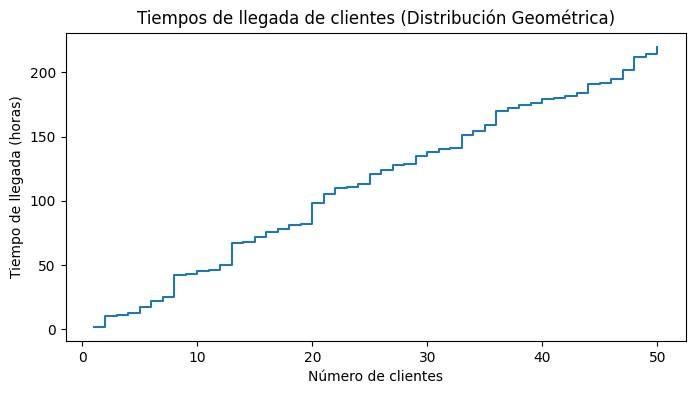

El valor esperado es: 5.0 horas


In [22]:
import matplotlib.pyplot as plt
import numpy as np

p = 0.2
horas = 10

intervalos = np.random.geometric(p, size=int(horas/p))

tiempo_llegada = np.cumsum(intervalos)

plt.figure(figsize=(8, 4))
plt.step(range(1, len(tiempo_llegada) + 1), tiempo_llegada, where='post')
plt.xlabel('Número de clientes')
plt.ylabel('Tiempo de llegada (horas)')
plt.title('Tiempos de llegada de clientes (Distribución Geométrica)')
plt.show()

# valor esperado
print(f"El valor esperado es: {1/p} horas")


3. ¿Qué modela la distribución geométrica en este escenario?
- La distribución geometrica modela el tiempo de espera, en cuanto a numero de clientes, hasta que llegue el primer cliente despues de un período sin clientes. 
4. ¿Cómo se compara el tiempo promedio entre llegadas con el valor esperado de la distribución geométrica?
- 

## Tasks 2
Modele los tiempos de servicio en un sistema de colas utilizando una distribución binomial negativa.
1. Genere una muestra aleatoria de 500 tiempos de servicio a partir de una distribución binomial negativa con
parámetros r=5 y p=0,4.
2. Trace un histograma de los tiempos de servicio y calcule la media y la varianza.
3. ¿Cómo se ajusta la distribución binomial negativa a los datos de tiempo de servicio?
4. Compare la media y la varianza de los datos con los valores teóricos de la distribución binomial negativa